# **Importing Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/restaurant-reviews/Restaurant_Reviews.tsv


# **Reading Files**

In [2]:
df = pd.read_csv('/kaggle/input/restaurant-reviews/Restaurant_Reviews.tsv',sep='\t')

# **Data Exploration**

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.info() #we dont have nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


# **Data Analysis**

**- How many likes and dislikes ?**

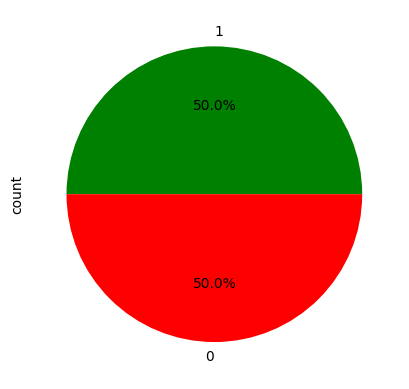

In [5]:
df['Liked'].value_counts().plot.pie(autopct='%0.1f%%',colors=['g','r'])
plt.show()

**- How many characters in each review ?**

**to count that we will creat a new column (characters_count)**

In [6]:
df['characters_count'] = df['Review'].apply(len)

In [7]:
df

,Review,Liked,characters_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [8]:
df['characters_count'].max() , df['characters_count'].idxmax()

(149, 985)

In [9]:
df.loc[985, 'Review']
#This is the tallest review (149 character)

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [10]:
df['characters_count'].mean() #

58.315

# **Text Pre-Processing**

In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any'

**Stemming**

In [12]:
from nltk.stem.porter import PorterStemmer
import re

In [13]:
port_stem = PorterStemmer()

In [14]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [15]:
# applying our function on review column
df['Review'] = df['Review'].apply(stemming)

In [16]:
df['Review'] #Review after stemming

0                                         wow love place
1                                             crust good
2                                     tasti textur nasti
3      stop late may bank holiday rick steve recommen...
4                                select menu great price
                             ...                        
995                        think food flavor textur lack
996                               appetit instantli gone
997                         overal impress would go back
998    whole experi underwhelm think go ninja sushi n...
999    wast enough life pour salt wound draw time too...
Name: Review, Length: 1000, dtype: object

# **Creating Model**

**- Vectorizing**

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tf = TfidfVectorizer()

In [19]:
tf.fit_transform(df['Review']).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

- **Model**

In [20]:
x = tf.fit_transform(df['Review']).toarray()
y= df['Liked']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
model = MultinomialNB()

In [25]:
model.fit(x_train,y_train)

MultinomialNB()

In [26]:
y_pred = model.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [28]:
con = confusion_matrix(y_pred,y_test)

In [29]:
print(con)

[[73 28]
 [23 76]]


In [30]:
acc = accuracy_score(y_pred,y_test)


In [31]:
print(acc)

0.745
